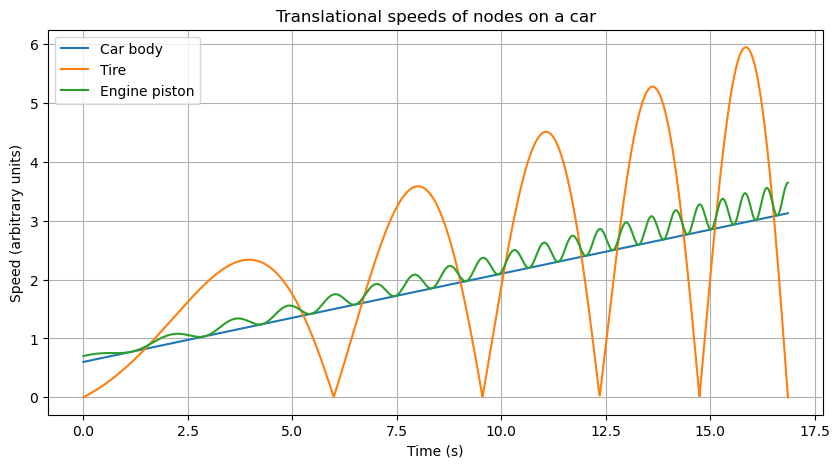

In [6]:
# Add a point attached to the center that oscillates vertically with a rate proportional to rolling speed
import numpy as np
import matplotlib.pyplot as plt

# Parameters (reuse previous setup)
R = 1.0
v0 = 0.6
a = 0.15                    # linear acceleration, so v(t)=v0+at
N_rot = 5                   # show ~5 rotations

# Oscillator parameters
A = 0.3 * R                 # vertical oscillation amplitude relative to center
k = 2.0                     # proportionality: oscillator frequency = k * rolling angular speed

# Time horizon to include N_rot rotations
Aq = 0.5*a
Bq = v0
Cq = -2*np.pi*N_rot*R
t_end = (-Bq + np.sqrt(Bq**2 - 4*Aq*Cq)) / (2*Aq) if Aq != 0 else (2*np.pi*N_rot*R)/v0

t = np.linspace(0, t_end, 1500)

# Kinematics of rolling
v_t = v0 + a*t                 # center speed
omega_t = v_t / R              # instantaneous angular speed
theta_t = (v0*t + 0.5*a*t**2) / R  # accumulated rotation

# Speeds:
v_center = v_t
v_rim = 2 * v_t * np.abs(np.sin(theta_t/2))

# Oscillating point dynamics
# y_rel(t) = A * sin(k * theta(t)); x follows center
# vy = d/dt y_rel = A * k * omega(t) * cos(k * theta(t))
vy_osc = A * k * omega_t * np.cos(k * theta_t)
vx_osc = v_t                   # same horizontal translation as the center
v_osc_mag = np.sqrt(vx_osc**2 + vy_osc**2)

# Plot speeds
plt.figure(figsize=(10,5))
plt.plot(t, v_center, label='Car body')
plt.plot(t, v_rim, label='Tire')
plt.plot(t, v_osc_mag, label='Engine piston')
plt.xlabel('Time (s)')
plt.ylabel('Speed (arbitrary units)')
plt.title('Translational speeds of nodes on a car')
plt.legend()
plt.grid(True)

# # Rotation markers
# k_vals = np.arange(1, N_rot+1)
# theta_targets = 2*np.pi*k_vals
# t_marks = (-v0 + np.sqrt(v0**2 + 2*a*R*theta_targets)) / a
# for tm in t_marks:
#     if tm < t_end:
#         plt.axvline(tm, linestyle='--', linewidth=0.8)

# plt.show()

# # Also show the oscillating point's vertical displacement over time for reference
# y_rel = A * np.sin(k * theta_t)

# plt.figure(figsize=(10,3.5))
# plt.plot(t, y_rel)
# plt.xlabel('Time (s)')
# plt.ylabel('y_rel (relative to center)')
# plt.title('Attached point vertical displacement: y_rel(t) = A sin(k θ(t))')
# plt.grid(True)
# plt.show()


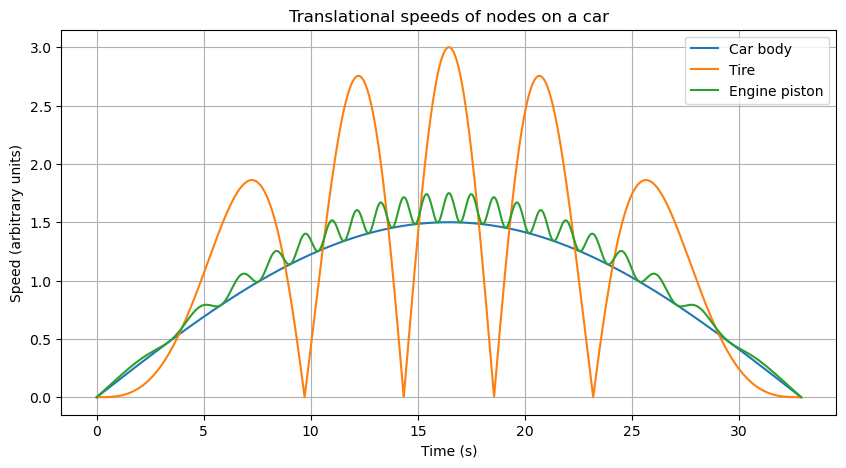

In [9]:
# Rolling circle with a "dome-shaped" speed profile for the car body:
# v(t) follows the first half-period of a sine: v(t) = v_peak * sin(pi * t / T), t in [0, T].
# We choose T so that the wheel completes N_rot full rotations over [0, T].

import numpy as np
import matplotlib.pyplot as plt

# Geometry and design choices
R = 1.0                 # wheel radius
N_rot = 5               # number of wheel rotations over the whole maneuver
v_peak = 1.5            # peak car speed (arbitrary units)
A = 0.3 * R             # piston vertical amplitude (relative to car body)
k = 2.0                 # piston frequency factor relative to rolling angular advance

# Determine total duration T so that θ(T) = 2π * N_rot with v(t) = v_peak * sin(pi t / T)
# θ(t) = ∫_0^t v(τ)/R dτ = (v_peak T / (π R)) * (1 - cos(π t / T))
# So θ(T) = 2 * v_peak T / (π R) = 2π N_rot  =>  T = (π^2 * N_rot * R) / v_peak
T = (np.pi**2) * N_rot * R / v_peak

# Time grid
t = np.linspace(0, T, 1800)

# Car body (center) speed profile ("upside-down dome")
v_t = v_peak * np.sin(np.pi * t / T)              # 0 -> v_peak -> 0
omega_t = v_t / R                                  # instantaneous wheel angular speed
theta_t = (v_peak * T / (np.pi * R)) * (1 - np.cos(np.pi * t / T))  # accumulated angle

# Speeds of nodes
v_body = v_t
v_tire = 2 * v_t * np.abs(np.sin(theta_t / 2))     # rim point of rolling wheel
vy_piston = A * k * omega_t * np.cos(k * theta_t)  # attached vertical oscillator
vx_piston = v_t                                    # same horizontal translation as body
v_piston = np.sqrt(vx_piston**2 + vy_piston**2)    # piston node speed magnitude

# Plot: translational speeds of the three nodes
plt.figure(figsize=(10,5))
plt.plot(t, v_body, label='Car body')
plt.plot(t, v_tire, label='Tire')
plt.plot(t, v_piston, label='Engine piston')
plt.xlabel('Time (s)')
plt.ylabel('Speed (arbitrary units)')
plt.title('Translational speeds of nodes on a car')
plt.legend()
plt.grid(True)


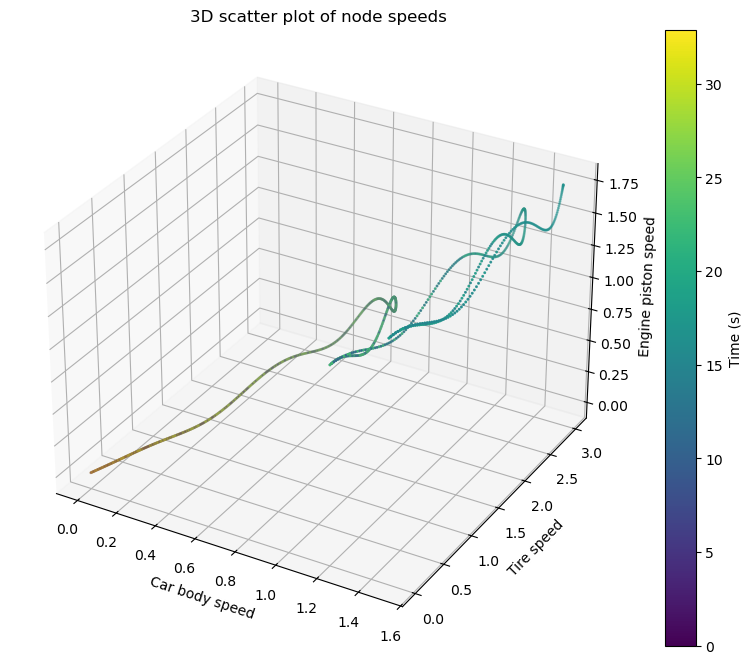

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Add small random noise to each speed value
noise_scale = 0  # adjust this to control noise magnitude
v_body_noisy = v_body + np.random.normal(0, noise_scale, size=v_body.shape)
v_tire_noisy = v_tire + np.random.normal(0, noise_scale, size=v_tire.shape)
v_piston_noisy = v_piston + np.random.normal(0, noise_scale, size=v_piston.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(v_body_noisy, v_tire_noisy, v_piston_noisy, c=t, cmap='viridis', s=1)

ax.set_xlabel('Car body speed')
ax.set_ylabel('Tire speed')
ax.set_zlabel('Engine piston speed')
ax.set_title('3D scatter plot of node speeds')

# Add colorbar to show time
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time (s)')

plt.show()

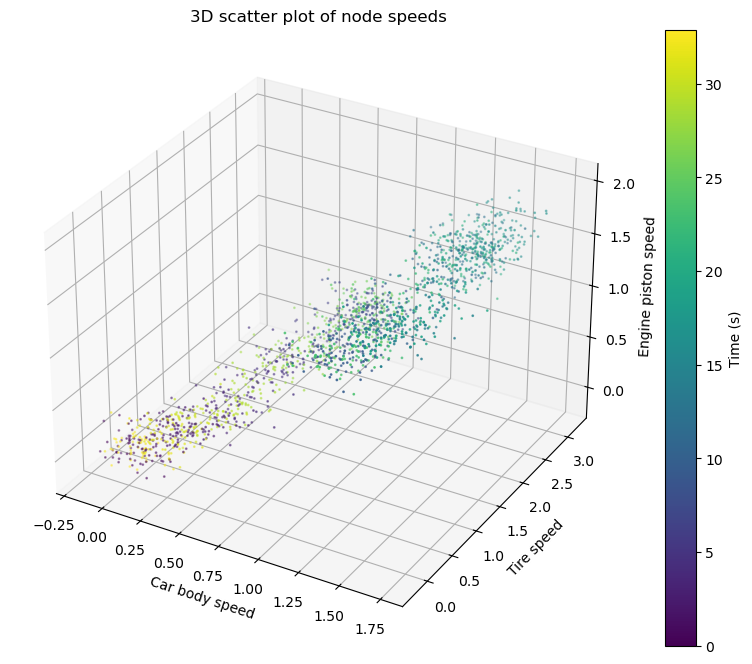

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Add small random noise to each speed value
noise_scale = 0.1  # adjust this to control noise magnitude
v_body_noisy = v_body + np.random.normal(0, noise_scale, size=v_body.shape)
v_tire_noisy = v_tire + np.random.normal(0, noise_scale, size=v_tire.shape)
v_piston_noisy = v_piston + np.random.normal(0, noise_scale, size=v_piston.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(v_body_noisy, v_tire_noisy, v_piston_noisy, c=t, cmap='viridis', s=1)

ax.set_xlabel('Car body speed')
ax.set_ylabel('Tire speed')
ax.set_zlabel('Engine piston speed')
ax.set_title('3D scatter plot of node speeds')

# Add colorbar to show time
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time (s)')

plt.show()

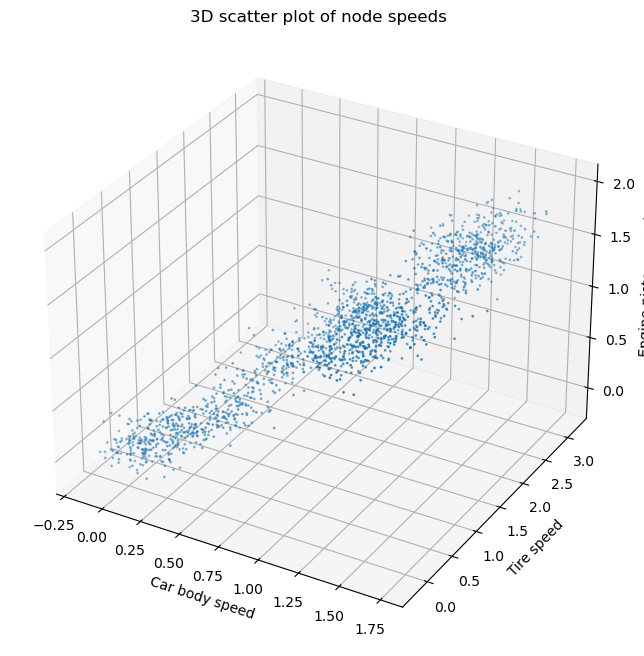

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(v_body_noisy, v_tire_noisy, v_piston_noisy, s=1)

ax.set_xlabel('Car body speed')
ax.set_ylabel('Tire speed')
ax.set_zlabel('Engine piston speed')
ax.set_title('3D scatter plot of node speeds')

plt.show()
